# <font color="#CA3532">Introducción a TensorFlow</font> 

Basado en https://github.com/aamini/introtodeeplearning/blob/master/lab1/Part1_TensorFlow.ipynb

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### <font color="#CA3532">Conceptos básicos</font>

**<font color="#CA3532">Tensores:</font>** Un tensor es un array de datos con un número arbitrario de dimensiones. El *rango* del tensor es el número de dimensiones del mismo.

- Un escalar es un tensor de rango 0
- Un vector es un tensor de rango 1
- Una matriz es un tensor de rango 2

Algunos ejemplos:

In [10]:
# Escalar, tensor de rango 0:
t0 = tf.constant(3.)
print(t0)
print(t0.numpy())
print(tf.shape(t0).numpy())
print(tf.rank(t0).numpy())

tf.Tensor(3.0, shape=(), dtype=float32)
3.0
[]
0


In [11]:
# Vector, tensor de rango 1:
t1 = tf.constant([1., 2., 3.])
print(t1)
print(t1.numpy())
print(tf.shape(t1).numpy())
print(tf.rank(t1).numpy())

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
[1. 2. 3.]
[3]
1


In [12]:
# Matriz, tensor de rango 2:
t2 = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(t2)
print(t2.numpy())
print(tf.shape(t2).numpy())
print(tf.rank(t2).numpy())

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
[[1. 2. 3.]
 [4. 5. 6.]]
[2 3]
2


In [13]:
# Tensor de rango 3:
t3 = tf.constant([[[1., 2., 3.]], [[7., 8., 9.]]])
print(t3)
print(t3.numpy())
print(tf.shape(t3).numpy())
print(tf.rank(t3).numpy())

tf.Tensor(
[[[1. 2. 3.]]

 [[7. 8. 9.]]], shape=(2, 1, 3), dtype=float32)
[[[1. 2. 3.]]

 [[7. 8. 9.]]]
[2 1 3]
3


### <font color="#CA3532">Grafo computacional</font>

Cada vez que realizamos una operación con tensores, TensorFlow construye un grafo:

- Los tensores constantes (o variables) son las entradas al grafo. 

- La información se propaga por el grafo de izquierda a derecha (forward) y en cada nodo se realiza una operación.

Ejemplo:

In [14]:
# Dos tensores constantes que entran en el grafo:
a = tf.constant(15)
b = tf.constant(61)
print(a)
print(b) 

# Suma (puedes usar tf.add o el operador +):
c1 = tf.add(a, b)
c2 = a + b 
print(c1)
print(c2)

tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(61, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Compatibilidad con Numpy:

In [15]:
z = a + np.ones((3, 3))
print(z)

tf.Tensor(
[[16 16 16]
 [16 16 16]
 [16 16 16]], shape=(3, 3), dtype=int32)


### <font color="#CA3532">Backward pass</font>

El grafo computacional también permite hacer una pasada hacia atrás (de derecha a izquierda) para calcular los gradientes. Para poder hacerlo es necesario:

1. Que el grafo contenga variables (tensores creados con tf.Variable)
2. Que el grafo se cree en el contexto de un *Gradient Tape*

Ejemplo: vamos a crear un grafo para la operación $3x^{2}$, donde $x$ es una variable. La variable tendrá inicialmente el valor $1$.

In [16]:
# Creamos constante y variable:
a = tf.constant(3.0)
x = tf.Variable(1.0)

# Definimos el grafo dentro de un Gradient Tape:
with tf.GradientTape() as tape:
  y = a*x*x

# Imprimimos el valor de y:
print("y =", y)
print("y =", y.numpy())

y = tf.Tensor(3.0, shape=(), dtype=float32)
y = 3.0


Para calcular el gradiente usamos el Gradient Tape:

In [17]:
dy_dx = tape.gradient(y, x)
print("dy_dx =", dy_dx)
print("dy_dx =", dy_dx.numpy())

dy_dx = tf.Tensor(6.0, shape=(), dtype=float32)
dy_dx = 6.0


Es mejor poner todo el código dentro de una función para poder reutilizarlo con más facilidad:

In [18]:
def ax2(a, x):
  x = tf.Variable(x)
  
  # Definicion del grafo:
  with tf.GradientTape() as tape:
    y = a*x**2 # Notese que a se interpreta como tensor constante

  # Calculo del gradiente:
  dy_dx = tape.gradient(y, x)

  return y, dy_dx

Probemos algunos ejemplos:

In [19]:
y, dy_dx = ax2(3.0, 1.0)
print("y =", y)
print("dy_dx =", dy_dx)

y = tf.Tensor(3.0, shape=(), dtype=float32)
dy_dx = tf.Tensor(6.0, shape=(), dtype=float32)


In [20]:
y, dy_dx = ax2(3.0, 3.0)
print("y =", y)
print("dy_dx =", dy_dx)

y = tf.Tensor(27.0, shape=(), dtype=float32)
dy_dx = tf.Tensor(18.0, shape=(), dtype=float32)


In [21]:
x = np.arange(-5, 5, 0.1)
print(x)
print(x.shape)

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

(100,)
(100,)


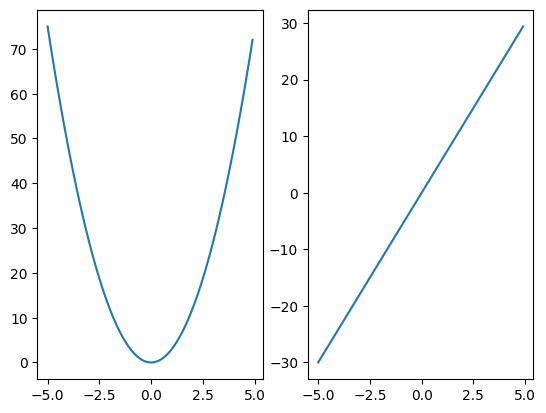

In [22]:
y, dy_dx = ax2(3.0, x)
print(y.shape)
print(dy_dx.shape)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.plot(x, dy_dx)
plt.show()

Puedes comprobar que tanto el cálculo de la función como su derivada son correctos.

**Ejercicio:** Construye una función que calcule el valor y el gradiente con respecto a $x$ de la expresión $y = \sin{x}$.

In [ ]:
def seno(x):
  x = tf.Variable(x)
  
  # Definicion del grafo:
  with tf.GradientTape() as tape:
    # TO-DO (tf.sin)
    
  # Calculo del gradiente:
  # TO-DO

  return y, dy_dx

Usa la función anterior para dibujar una gráfica de la función seno y su derivada:

In [ ]:
x = np.arange(0, 2*np.pi, 0.01)
y, dy_dx = seno(x) # Observa que puedo pasar un array a la funcion

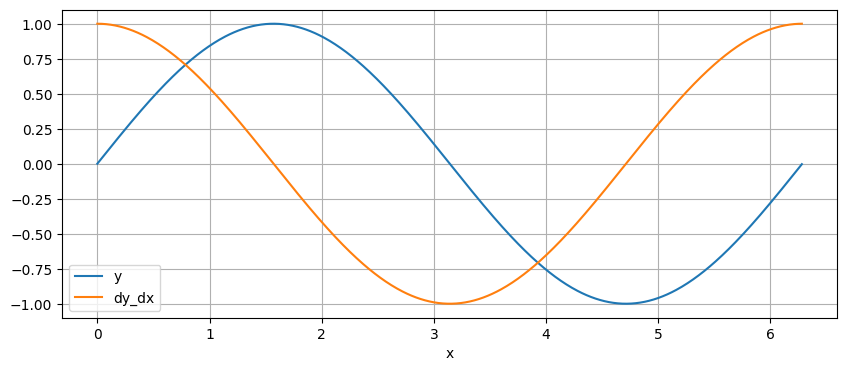

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(x, y, label="y")
plt.plot(x, dy_dx, label="dy_dx")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.show()

**Ejercicio:** Construye una función que calcule el valor y el gradiente con respecto a $x$ de la expresión $y = \sigma{(x)}$. Recuerda que la función sigmoide es esta:

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

In [ ]:
def sigmoide(x):
  x = tf.Variable(x)
  
  # Definicion del grafo:
  with tf.GradientTape() as tape:
    # TO-DO (tf.sigmoid o bien tf.exp)
    
  # Calculo del gradiente:
  # TO-DO

  return y, dy_dx

Usa la función anterior para dibujar una gráfica de la función sigmoide y su derivada:

In [ ]:
x = np.arange(-10., 10., 0.01)
y, dy_dx = sigmoide(x) # Observa que puedo pasar un array a la funcion

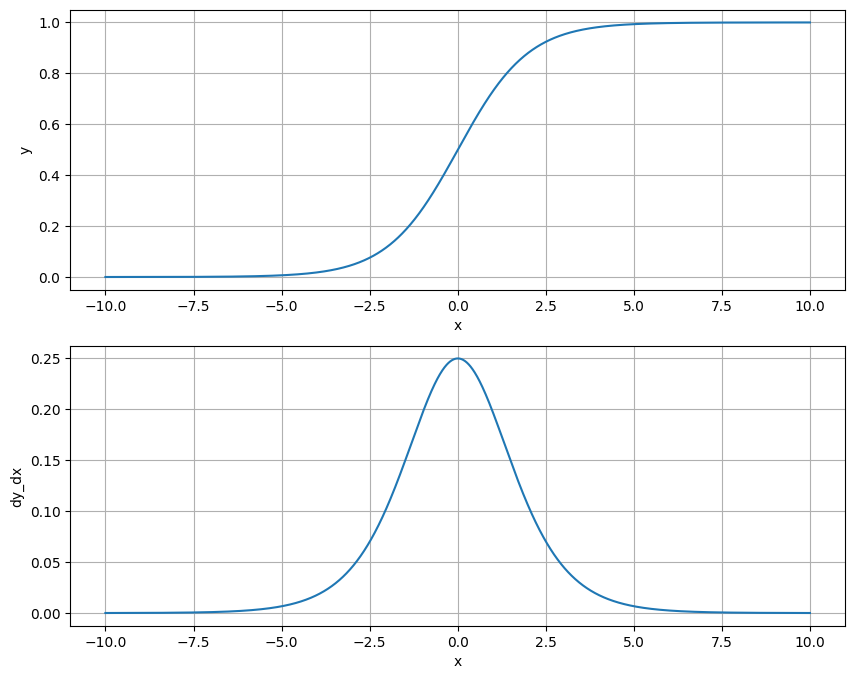

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(2, 1, 2)
plt.plot(x, dy_dx)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("dy_dx")
plt.show()

### <font color="#CA3532">Descenso por gradiente</font>

Por supuesto, podemos utilizar los gradientes calculados por la diferenciación automática para optimizar una determinada función. A continuación tienes un ejemplo.

Queremos encontrar el mínimo de la función $y = (x - x_{0})^{2}$. No es difícil hallar analíticamente que el mínimo se produce cuando $x = x_{0}$. Pero vamos a hacerlo numéricamente.

Valor inicial x =  [-0.4522883]


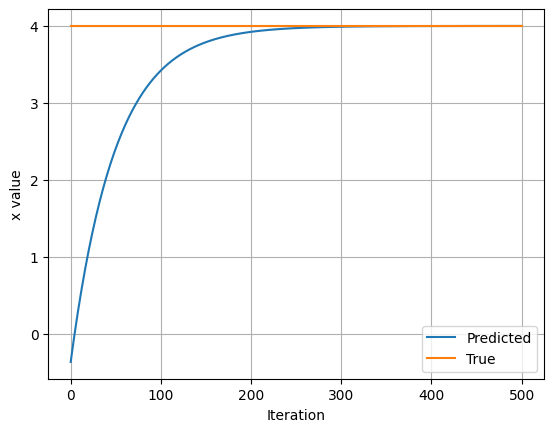

In [ ]:
# Inicializamos la x al azar:
x = tf.Variable(tf.random.normal((1,)))
print("Valor inicial x = ", x.numpy())

# Factor de aprendizaje:
learning_rate = 1.e-2

# Lista para almacenar los valores que va tomando x:
history = []

# Valor objetivo, x_0:
x_0 = 4

# Numero de iteraciones:
niters = 500

# Bucle de optimizacion:
for i in range(niters):
  # Definicion del grafo:
  # TO-DO

  # Calculo del gradiente:
  # TO-DO

  # Actualizacion de x:
  new_x = x - learning_rate*grad 
  x.assign(new_x) # Ojo, usamos el metodo assign para asignar un valor a una variable

  # Actualizamos la lista de valores de x:
  history.append(x.numpy()[0])

# Grafica que muestra la evolucion de x:
plt.plot(history)
plt.plot([0, 500], [x_0, x_0])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

### <font color="#CA3532">Regresión lineal</font>

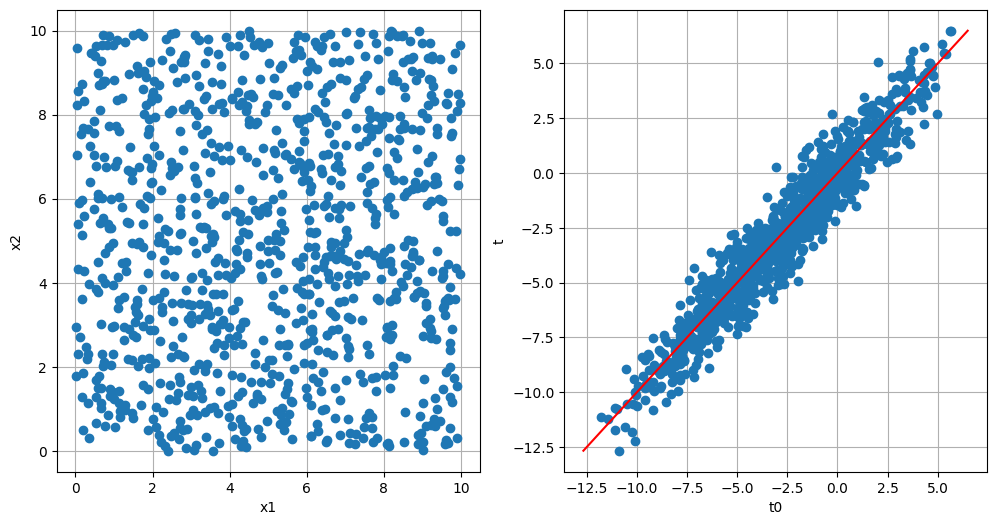

Error esperado = 1006.103907


In [23]:
# Parametros:
d = 5 # Dimension del problema
w = np.random.randn(d, 1)
b = 1.0
xmin = 0.0
xmax = 10.0
noise = 1.0
n = 1000

# Datos del problema generados al azar:
x = xmin + np.random.rand(d, n)*(xmax - xmin)
t0 = np.dot(w.T,x) + b 
t = t0 + np.random.randn(n)*noise
tmin = np.min(t)
tmax = np.max(t)

# Distribucion de las dos primeras variables:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x[0,:], x[1,:], 'o')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(122)

# Grafica de t frente a t0:
plt.plot(t0[0], t[0], 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t0")
plt.ylabel("t")
plt.show()

# Error esperado:
e = np.sum((t-t0)*(t-t0))
print("Error esperado = %f" % e)

In [24]:
x = tf.constant(x)
t = tf.constant(t)

In [25]:
print(x.shape)

(5, 1000)


In [26]:
print(t.shape)

(1, 1000)


Modelo en tensorflow:

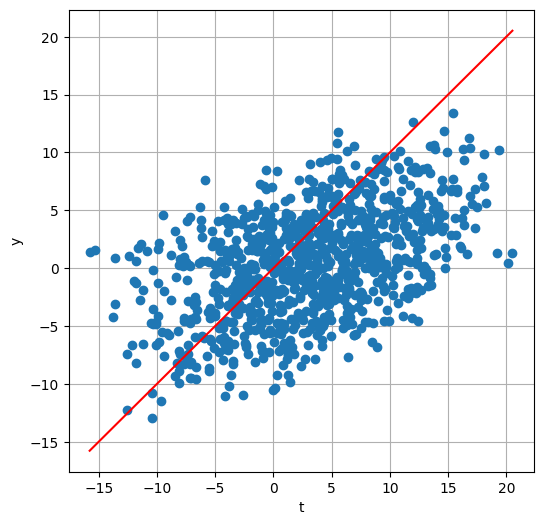

Error = 42846.475500


In [ ]:
w = tf.Variable(tf.random.normal(shape=[d, 1], dtype=tf.dtypes.float64))  
b = tf.Variable(tf.random.normal(shape=[1], dtype=tf.dtypes.float64)) 

# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
# tf.matmul y @ son equivalentes:
#y = tf.matmul(tf.transpose(w), x) + b
y = tf.transpose(w)@x + b

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t[0], y[0], 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = np.sum((y-t)*(y-t))  
print("Error = %f" % e)

In [ ]:
nepocas = 64
eta = 0.005

error = []
for i in range(nepocas):
  # Definicion del grafo:
  # Ojo, persistent = True porque vamos a calcular gradientes respecto a mas de 
  # una variable (vamos a llamar varias veces a tape.gradient)
  with tf.GradientTape(persistent=True) as tape: 
    # Calculo de la salida y:
    # TO-DO - tf.matmul y @ son equivalentes:

    # Calculo de la funcion de coste:
    loss = tf.reduce_mean((y - t)**2)

  error.append(loss.numpy())
  
  # Calculo de los gradientes:
  # TO-DO
  
  # Actualizacion de los parametros:
  # TO-DO (ojo assign)


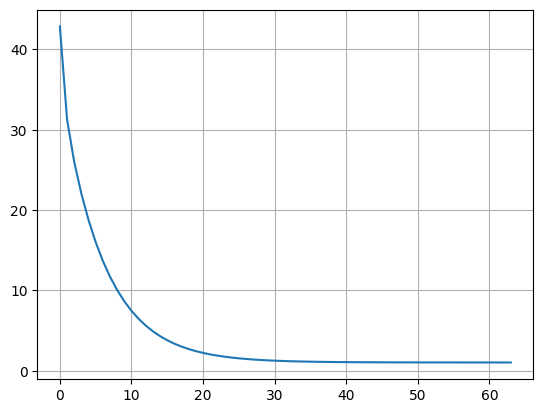

In [ ]:
plt.plot(error)
plt.grid(True)
plt.show()

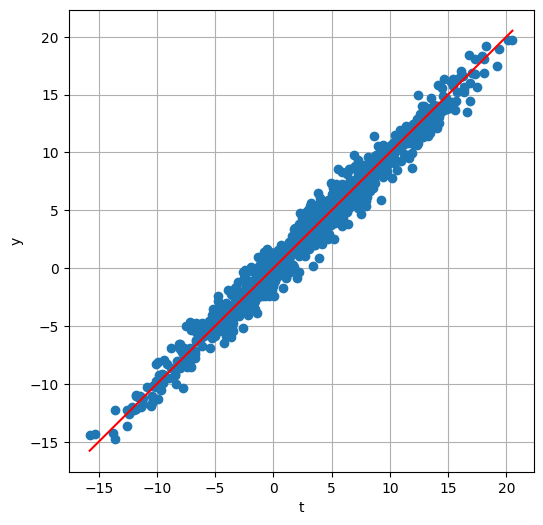

Error = 1031.070524


In [ ]:
# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
y = tf.matmul(tf.transpose(w), x) + b

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t[0], y[0], 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = np.sum((y-t)*(y-t))  
print("Error = %f" % e)

Con un tape no persistente y llamando sólo una vez a tape.gradient:

In [ ]:
w = tf.Variable(tf.random.normal(shape=[d, 1], dtype=tf.dtypes.float64))  
b = tf.Variable(tf.random.normal(shape=[1], dtype=tf.dtypes.float64)) 

In [ ]:
nepocas = 64
eta = 0.005

error = []
for i in range(nepocas):
  # Definicion del grafo:
  # Ojo, persistent = True porque vamos a calcular gradientes respecto a mas de 
  # una variable (vamos a llamar varias veces a tape.gradient)
  with tf.GradientTape() as tape: 
    # Calculo de la salida y:
    # TO-DO - tf.matmul y @ son equivalentes:

    # Calculo de la funcion de coste:
    loss = tf.reduce_mean((y - t)**2)

  error.append(loss.numpy())
  
  # Calculo de los gradientes:
  # TO-DO
  
  # Actualizacion de los parametros:
  # TO-DO (ojo assign)


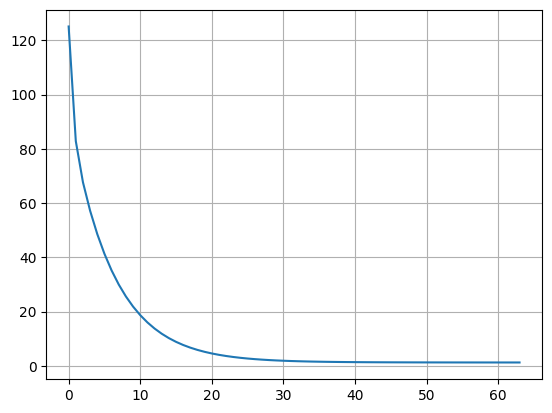

In [ ]:
plt.plot(error)
plt.grid(True)
plt.show()

### <font color="#CA3532">Ejercicios</font>

<b><font color="#CA3532">Ejercicios de regresión - California Housing</font></b>

1. Regresión lineal.

  1.1. Construir una clase *LinearRegressionModel* en tensorflow mediante una RN sin capas ocultas.

  1.2. Aplicar el modelo al problema *California Housing*.
  
  1.3. Comparar los resultados con los del modelo implementado en Numpy (ver notebook ``02_lin_reg_exercise.ipynb``).

2. Red neuronal para regresión.

  2.1. Construir una clase *NeuralNetworkRegressionModel* en tensorflow con un número arbitrario de capas ocultas.

  2.2. Aplicar el modelo al problema *California Housing*.

  2.3. Comparar los resultados con los del modelo implementado en Numpy (ver notebook ``04_red_simple_para_clase.ipynb``).

<b><font color="#CA3532">Ejercicios de clasificación - Breast Cancer Wisconsin</font></b>

3. Regresión logística.

  3.1. Construir una clase *LogisticRegressionModel* en tensorflow mediante una RN sin capas ocultas.

  3.2. Aplicar el modelo al problema *Breast Cancer Wisconsin*.

  3.3. Comparar los resultados con los del modelo implementado en Numpy (ver notebook ``03_log_reg_exercise.ipynb``).

4. Red neuronal para clasificación.

  4.1. Construir una clase *NeuralNetworkModel* en tensorflow con un número arbitrario de capas ocultas y solamente 1 neurona en la capa de salida con activación sigmoid.

  4.2. Aplicar el modelo al problema *Breast Cancer Wisconsin*.

  4.3. Comparar los resultados con los del modelo implementado en Numpy (ver notebook ``04_red_simple_para_clase.ipynb``).

## <font color="#CA3532">Ejercicios de regresión - California Housing</font>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x, t = fetch_california_housing(return_X_y=True, as_frame=True)
print(x.shape)
print(t.shape)

In [ ]:
x = x.values[:1000]
t = t.values[:1000]
t = t[:, None]

print(x.shape)
print(t.shape)

In [ ]:
# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=12)

# Estandarizacion:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

### Ejercicio 1: Regresión lineal con California Housing

1.1. Construir una clase LinearRegressionModel en tensorflow mediante una RN sin capas ocultas.

In [ ]:
class LinearRegressionModel:

  def __init__(self, d0=2):
    self.W = tf.Variable(tf.random.normal(shape=[d0, 1], dtype=tf.dtypes.float64))  
    self.b = tf.Variable(tf.random.normal(shape=[1], dtype=tf.dtypes.float64)) 

  def predict(self, x):
    """
    x must be a (n,d0) array
    returns a (n,1) array with the predictions for each of the n patterns
    """
    # TO-DO: Calcula la y para regresión lineal

    return y

  def mse(self, x, t):
    """
    computes the MSE between the model predictions and the targets
    """
    # TO-DO: Calcula el error cuadrático medio utilizando la función tf.reduce_mean

    return mse

  def fit(self, x, t, eta, num_epochs):
    """
    Fits the model parameters with data (x, t) using a learning rate eta and
    num_epochs epochs
    """
    mse_history = []
    for epoch in range(num_epochs):
      with tf.GradientTape() as tape:
        # TO-DO: Define el cálculo forward del error dentro de GradientTape para que
        #        se guarden las derivadas
        pass

      mse_history.append(mse.numpy().ravel()[0])
      
      [db, dW] = tape.gradient(mse, [self.b, self.W])
      self.b.assign(self.b - eta*db)
      self.W.assign(self.W - eta*dW)
      
    return mse_history

In [ ]:
# ------------------------------------------------------
# TO-DO: Construcción y entrenamiento del modelo

# Construccion del modelo

# Entrenamiento del modelo

# ------------------------------------------------------

plt.plot(error)
plt.grid(True)
plt.show()

Evaluar en training y test después del entrenamiento:

In [ ]:
print("MSE training:", model.mse(x_train, t_train).numpy()[0])
print("MSE test:", model.mse(x_test, t_test).numpy()[0])

Si quisieramos evaluar el test en cada época:

In [ ]:
# Construccion del modelo
n, d = x.shape

model = LinearRegressionModel(d)

# Entrenamiento del modelo
eta = 0.01
epochs = 200

error_training = []
error_test = []
for e in range(epochs):
  error = model.fit(x_train, t_train, eta, 1)
  error_training.append(error)
  error = model.mse(x_test, t_test)
  error_test.append(error)
plt.plot(error_training, label="Train")
plt.plot(error_test, label="Test")
plt.grid(True)
plt.legend()
plt.show()

Visualizar los datos

In [ ]:
# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
y = model.predict(x_test)

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t_test, y, 'o')
plt.plot([0, 6], [0, 6], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = model.mse(x_test, t_test)
print("Error = %f" % e)

### Ejercicio 2: Red neuronal para regresión - California Housing

2.1. Construir una clase NeuralNetworkRegressionModel en tensorflow con un número arbitrario de capas ocultas.

In [ ]:
class NeuralNetworkRegressionModel:

  def __init__(self, layers_size=[2]):
    self.W = [tf.Variable(tf.random.normal(shape=[a, b], dtype=tf.dtypes.float64)) for a, b in zip(layers_size[:-1], layers_size[1:])]
    self.b = [tf.Variable(tf.random.normal(shape=[1, b], dtype=tf.dtypes.float64)) for b in layers_size[1:]]

    self.W.append(tf.Variable(tf.random.normal(shape=[layers_size[-1], 1], dtype=tf.dtypes.float64)))
    self.b.append(tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.dtypes.float64)))

  def predict(self, x):
    """
    x must be a (n,d0) array
    returns a (n,1) array with the predictions for each of the n patterns
    """
    # TO-DO: Calcula la y para la red neuronal de regresión
 
    return y

  def mse(self, x, t):
    """
    computes the MSE between the model predictions and the targets
    """
    # TO-DO: Calcula el error cuadrático medio utilizando la función tf.reduce_mean

    return mse

  def fit(self, x, t, eta, num_epochs):
    """
    Fits the model parameters with data (x, t) using a learning rate eta and
    num_epochs epochs
    """
    mse_history = []
    for epoch in range(num_epochs):
      # OJO: Es necesario persistent=True porque vamos a querer obtener los gradientes 
      #      de W y bias por capa.
      with tf.GradientTape(persistent=True) as tape:
        # TO-DO: Define el cálculo forward del error dentro de GradientTape para que
        #        se guarden las derivadas
        pass

      mse_history.append(mse.numpy().ravel()[0])
      
      # Aquí calculamos los gradientes por capa, por eso necesitamos persistent=True
      # en el gradientTape
      for b, W in zip(self.b, self.W):
        [db, dW] = tape.gradient(mse, [b, W])
        b.assign(b - eta*db)
        W.assign(W - eta*dW)
      
    return mse_history

In [ ]:
# ------------------------------------------------------
# TO-DO: Construcción y entrenamiento del modelo

# Construccion del modelo

# Entrenamiento del modelo

# ------------------------------------------------------

plt.plot(error)
plt.grid(True)
plt.show()

Evaluar en training y test después del entrenamiento:

In [ ]:
print("MSE training:", model.mse(x_train, t_train).numpy()[0])
print("MSE test:", model.mse(x_test, t_test).numpy()[0])

Si quisieramos evaluar el test en cada época:

In [ ]:
# Construccion del modelo
n, input_dimension = x.shape
hidden_layers_d = [5]

model = NeuralNetworkRegressionModel([input_dimension] + hidden_layers_d)

# Entrenamiento del modelo
eta = 0.01
epochs = 2000

error_training = []
error_test = []
for e in range(epochs):
  error = model.fit(x_train, t_train, eta, 1)
  error_training.append(error)
  error = model.mse(x_test, t_test)
  error_test.append(error)
plt.plot(error_training, label="Train")
plt.plot(error_test, label="Test")
plt.grid(True)
plt.legend()
plt.show()

Visualizar los datos:

In [ ]:
# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
y = model.predict(x_test)

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t_test, y, 'o')
plt.plot([0, 6], [0, 6], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = model.mse(x_test, t_test)
print("Error = %f" % e)

## <font color="#CA3532">Ejercicios de clasificación - Breast Cancer Wisconsin</font>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_breast_cancer()
x = data.data
t = data.target[:, None]
print(x.shape)
print(t.shape)

In [ ]:
# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=12)

# Estandarizacion:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

### Ejercicio 3: Regresión logística con Breast Cancer Wisconsin

3.1. Construir una clase LogisticRegressionModel en tensorflow mediante una RN sin capas ocultas.

In [ ]:
class LogisticRegressionModel:

  def __init__(self, d0=2):
    self.W = tf.Variable(tf.random.normal(shape=[d0, 1], dtype=tf.dtypes.float64))  
    self.b = tf.Variable(tf.random.normal(shape=[1], dtype=tf.dtypes.float64)) 

  def predict(self, x):
    """
    x must be a (n,d0) array
    returns a (n,1) array with the predictions for each of the n patterns
    """
    # TO-DO: Calcula la y para la red neuronal de clasificación

    return y

  def loss(self, x, t):
    """
    computes the cross-entropy between the model predictions and the targets
    """
    # TO-DO: Calcula el cross-entropy loss. Puedes calcularlo a mano con tf.reduce_mean
    #        o utilizar alguna función definida en tensorflow para calcular crossentropy
    #        OJO: que no esté en la librería tf.keras

    return loss

  def fit(self, x, t, eta, num_epochs):
    """
    Fits the model parameters with data (x, t) using a learning rate eta and
    num_epochs epochs
    """
    loss_history = []
    for epoch in range(num_epochs):
      with tf.GradientTape() as tape:
        # TO-DO: Define el cálculo forward del loss dentro de GradientTape para que
        #        se guarden las derivadas
        pass

      loss_history.append(loss.numpy().ravel()[0])
      
      [db, dW] = tape.gradient(loss, [self.b, self.W])
      self.b.assign(self.b - eta*db)
      self.W.assign(self.W - eta*dW)
      
    return loss_history

  def accuracy(self, x, t):
    y = self.predict(x).numpy()
    pred = y > 0.5
    return np.mean(pred == t)

In [ ]:
# ------------------------------------------------------
# TO-DO: Construcción y entrenamiento del modelo

# Construccion del modelo

# Entrenamiento del modelo

# ------------------------------------------------------

plt.plot(error)
plt.grid(True)
plt.show()

Evaluar en training y test después del entrenamiento:

In [ ]:
print("Loss training:", model.loss(x_train, t_train).numpy()[0])
print("Acc training:", model.accuracy(x_train, t_train))
print("Loss test:", model.loss(x_test, t_test).numpy()[0])
print("Acc test:", model.accuracy(x_test, t_test))

Si queremos evaluar en test en cada época:

In [ ]:
# Construccion del modelo
n, d = x.shape

model = LogisticRegressionModel(d)

# Entrenamiento del modelo
eta = 0.1
epochs = 200

loss_training = []
acc_training = []
loss_test = []
acc_test = []
for e in range(epochs):
  loss = model.fit(x_train, t_train, eta, 1)
  loss_training.append(loss)
  acc = model.accuracy(x_train, t_train)
  acc_training.append(acc)

  loss = model.loss(x_test, t_test)
  loss_test.append(loss)
  acc = model.accuracy(x_test, t_test)
  acc_test.append(acc)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_training, label="train")
plt.plot(range(epochs), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epochs), acc_training, label="train")
plt.plot(range(epochs), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:
print("Loss training:", model.loss(x_train, t_train).numpy()[0])
print("Acc training:", model.accuracy(x_train, t_train))
print("Loss test:", model.loss(x_test, t_test).numpy()[0])
print("Acc test:", model.accuracy(x_test, t_test))

### Ejercicio 4: Red neuronal para clasificación - Breast Cancer Wisconsin

4.1. Construir una clase NeuralNetworkModel en tensorflow con un número arbitrario de capas ocultas y solamente 1 neurona en la capa de salida con activación sigmoid.

In [ ]:
class NeuralNetworkModel:

  def __init__(self, layers_size=[2]):
    self.W = [tf.Variable(tf.random.normal(shape=[a, b], dtype=tf.dtypes.float64)) for a, b in zip(layers_size[:-1], layers_size[1:])]
    self.b = [tf.Variable(tf.random.normal(shape=[1, b], dtype=tf.dtypes.float64)) for b in layers_size[1:]]

    self.W.append(tf.Variable(tf.random.normal(shape=[layers_size[-1], 1], dtype=tf.dtypes.float64)))
    self.b.append(tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.dtypes.float64)))

  def predict(self, x):
    """
    x must be a (n,d0) array
    returns a (n,1) array with the predictions for each of the n patterns
    """
    # TO-DO: Calcula la y para la red neuronal de clasificación
 
    return y

  def loss(self, x, t):
    """
    computes the MSE between the model predictions and the targets
    """
    # TO-DO: Calcula el cross-entropy loss. Puedes calcularlo a mano con tf.reduce_mean
    #        o utilizar alguna función definida en tensorflow para calcular crossentropy
    #        OJO: que no esté en la librería tf.keras

    return loss

  def fit(self, x, t, eta, num_epochs):
    """
    Fits the model parameters with data (x, t) using a learning rate eta and
    num_epochs epochs
    """
    loss_history = []
    for epoch in range(num_epochs):
      # OJO: Es necesario persistent=True porque vamos a querer obtener los gradientes 
      #      de W y bias por capa.
      with tf.GradientTape(persistent=True) as tape:
        # TO-DO: Define el cálculo forward del loss dentro de GradientTape para que
        #        se guarden las derivadas
        pass

      loss_history.append(loss.numpy().ravel()[0])
      
      # Aquí calculamos los gradientes por capa, por eso necesitamos persistent=True
      # en el gradientTape
      for b, W in zip(self.b, self.W):
        [db, dW] = tape.gradient(loss, [b, W])
        b.assign(b - eta*db)
        W.assign(W - eta*dW)
      
    return loss_history

  def accuracy(self, x, t):
    y = self.predict(x).numpy()
    pred = y > 0.5
    return np.mean(pred == t)

In [ ]:
# ------------------------------------------------------
# TO-DO: Construcción y entrenamiento del modelo

# Construccion del modelo

# Entrenamiento del modelo

# ------------------------------------------------------
plt.plot(error)
plt.grid(True)
plt.show()

Evaluación en training y test después del entrenamiento:

In [ ]:
print("Loss training:", model.loss(x_train, t_train).numpy()[0])
print("Acc training:", model.accuracy(x_train, t_train))
print("Loss test:", model.loss(x_test, t_test).numpy()[0])
print("Acc test:", model.accuracy(x_test, t_test))

Si queremos evaluar test en cada época:

In [ ]:
# Construccion del modelo
n, input_dimension = x.shape
hidden_layers_d = [5]

model = NeuralNetworkModel([input_dimension] + hidden_layers_d)

# Entrenamiento del modelo
eta = 0.1
epochs = 1000

loss_training = []
acc_training = []
loss_test = []
acc_test = []
for e in range(epochs):
  loss = model.fit(x_train, t_train, eta, 1)
  loss_training.append(loss)
  acc = model.accuracy(x_train, t_train)
  acc_training.append(acc)

  loss = model.loss(x_test, t_test)
  loss_test.append(loss)
  acc = model.accuracy(x_test, t_test)
  acc_test.append(acc)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_training, label="train")
plt.plot(range(epochs), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epochs), acc_training, label="train")
plt.plot(range(epochs), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:
print("Loss training:", model.loss(x_train, t_train).numpy()[0])
print("Acc training:", model.accuracy(x_train, t_train))
print("Loss test:", model.loss(x_test, t_test).numpy()[0])
print("Acc test:", model.accuracy(x_test, t_test))

# <font color="#CA3532">Entrenamiento con mini-batches</font>

Hasta ahora hemos visto que el entrenamiento de un modelo se hace por épocas, pasando en cada época todos los datos disponibles por el modelo para calcular los gradientes. Sin embargo, este método de entrenamiento tiene una gran desventaja: **es necesario procesar todo el dataset de entrenamiento para realizar una única modificación de los parámetros de la red**.

En problemas pequeños, como los que hemos visto, este inconveniente no supone ningún problema. Sin embargo, en problemas reales, donde pueden llegarse a procesar millones de datos, es inviable seguir con esta estrategia.

<b><font color="#CA3532">Solución:</font> Entrenar mediante lotes (batches)</b>

El entrenamiento con mini-batches consiste en actualizar los pesos después de que el modelo haya procesado un número determinado de datos. Esto implica que **en una época haya más de una actualización de los parámetros de la red**. El tamaño del batch (*batch_size*) será entonces un hiperparámetro más para ajustar.

Vamos a modificar la clase *NeuralNetworkModel* anterior para añadir un método *train_on_batch*.

In [ ]:
class NeuralNetworkModel:

  def __init__(self, layers_size=[2]):
    self.W = [tf.Variable(tf.random.normal(shape=[a, b], dtype=tf.dtypes.float64)) for a, b in zip(layers_size[:-1], layers_size[1:])]
    self.b = [tf.Variable(tf.random.normal(shape=[1, b], dtype=tf.dtypes.float64)) for b in layers_size[1:]]

    self.W.append(tf.Variable(tf.random.normal(shape=[layers_size[-1], 1], dtype=tf.dtypes.float64)))
    self.b.append(tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.dtypes.float64)))

  def predict(self, x):
    """
    x must be a (n,d0) array
    returns a (n,1) array with the predictions for each of the n patterns
    """
    y = x
    for w, b in zip(self.W, self.b):
      z = tf.matmul(y, w) + b
      y = tf.sigmoid(z)
 
    return y

  def loss(self, x, t):
    """
    computes the cross-entropy loss between the model predictions and the targets
    """
    y = self.predict(x)
    loss = tf.reduce_mean(-t*tf.math.log(y) - (1.-t)*tf.math.log(1.-y), axis=0)
    return loss

  def train_on_batch(self, x, t, eta):
    """
    Makes a parameter update using one single batch of data.
    """
    # En esta función train_on_batch, asumimos que x y t son un subconjunto de
    # los datos de train completos. Cómo dividir los datos en batches se lo dejamos
    # al usuario cuando llame a la función
    with tf.GradientTape(persistent=True) as tape:
      loss = self.loss(x, t)
    
    for b, W in zip(self.b, self.W):
      [db, dW] = tape.gradient(loss, [b, W])
      b.assign(b - eta*db)
      W.assign(W - eta*dW)

  def fit(self, x, t, eta, num_epochs):
    """
    Fits the model parameters with data (x, t) using a learning rate eta and
    num_epochs epochs
    """
    loss_history = []
    for epoch in range(num_epochs):
      with tf.GradientTape(persistent=True) as tape:
        loss = self.loss(x, t)

      loss_history.append(loss.numpy().ravel()[0])
      
      for b, W in zip(self.b, self.W):
        [db, dW] = tape.gradient(loss, [b, W])
        b.assign(b - eta*db)
        W.assign(W - eta*dW)
      
    return loss_history

  def accuracy(self, x, t):
    y = self.predict(x).numpy()
    pred = y > 0.5
    return np.mean(pred == t)

Entrenamiento con un único batch con todos los datos:

In [ ]:
%%time

n, d = x_train.shape
eta = 0.1
num_epochs = 500

nlrm = NeuralNetworkModel([d, 32])

loss_train = nlrm.loss(x_train, t_train)
print("Loss (train) antes de entrenar:", loss_train.numpy()[0])

# Entrenamiento:
loss = nlrm.fit(x_train, t_train, eta, num_epochs)

loss_train = nlrm.loss(x_train, t_train)
print("Loss (train) despues de entrenar:", loss_train.numpy()[0])
loss_test = nlrm.loss(x_test, t_test)
print("Loss (test) despues de entrenar:", loss_test.numpy()[0])

acc_train = nlrm.accuracy(x_train, t_train)
print("Accuracy (train) después de entrenar:", acc_train)
acc_test = nlrm.accuracy(x_test, t_test)
print("Accuracy (test) después de entrenar:", acc_test)

In [ ]:
plt.plot(range(num_epochs), loss)
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("Cross Entropy")
plt.show()

Entrenamiento por batches:

In [ ]:
%%time

n, d = x_train.shape
eta = 0.01
num_epochs = 20

batch_size = 10
num_batches = np.ceil(n/batch_size).astype(int)

nlrm = NeuralNetworkModel([d, 32])

# Entrenamiento, es necesario implementar el bucle aqui:
loss_train = []
loss_test = []
acc_train = []
acc_test = []
for epoch in range(num_epochs):
  # Permutacion aleatoria para desordenar los datos:
  ix = np.random.permutation(n)
  
  # Genero los batches y ajusto pesos con cada batch:
  for j in range(num_batches):
    imin = j*batch_size
    imax = np.minimum(n, (j+1)*batch_size)
    x_batch = x_train[ix[imin:imax]]
    t_batch = t_train[ix[imin:imax]]

    nlrm.train_on_batch(x_batch, t_batch, eta)
    
  # Al finalizar cada epoca calculo el error en training y test:
  loss_train.append(nlrm.loss(x_train, t_train).numpy())
  loss_test.append(nlrm.loss(x_test, t_test).numpy())
  acc_train.append(nlrm.accuracy(x_train, t_train))
  acc_test.append(nlrm.accuracy(x_test, t_test))

print("Loss (train) despues de entrenar:", loss_train[-1][0])
print("Loss (test) despues de entrenar:", loss_test[-1][0])
print("Accuracy (train) después de entrenar:", acc_train[-1])
print("Accuracy (test) después de entrenar:", acc_test[-1])


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(range(num_epochs), loss_train, label="train")
plt.plot(range(num_epochs), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(num_epochs), acc_train, label="train")
plt.plot(range(num_epochs), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Discutir los resultados**

¿Has comparado el número de épocas del entrenamiento de los dos casos?

¿Cuál tarda más en dar una vuelta completa de los datos?

## <font color="#CA3532">Preguntas del último día</font>

¿Cómo podríamos construir un modelo multiclase?

1. Con regresión logística, ¿qué podemos hacer?

2. Con redes neuronales, ¿qué podemos hacer?

Lo vemos en el notebook ``06_tf-problema-multiclase.ipynb``.